### Importing The Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Importing The Dataset

In [95]:
train_df = pd.read_csv('train_ctrUa4K.csv')
test_df = pd.read_csv('test_lAUu6dG.csv')

In [96]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [97]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [98]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [99]:
train_df.shape

(614, 13)

In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [101]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [102]:
train_df.describe(exclude = [object])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [103]:
train_df.describe(include = [object])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [104]:
correlation = train_df.corr()

<AxesSubplot:>

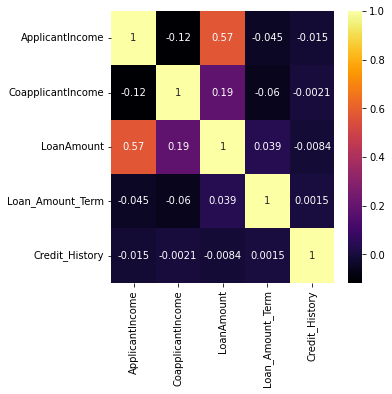

In [105]:
plt.figure(figsize = (5, 5))
sns.heatmap(correlation, annot = True, cmap = 'inferno')

In [106]:
categorical_features = [column_name for column_name in train_df.columns if train_df[column_name].dtype == 'O']
print('Categorical Features : {}'.format(len(categorical_features)))
print('Categorical Features : {}'.format(categorical_features))

Categorical Features : 8
Categorical Features : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [107]:
numerical_features = [column_name for column_name in train_df.columns if train_df[column_name].dtype != 'O']
print('Numerical Features : {}'.format(len(numerical_features)))
print('Numerical Features : {}'.format(numerical_features))

Numerical Features : 5
Numerical Features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [108]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [109]:
train_df[categorical_features].isna().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [110]:
categorical_features_with_null = [feature for feature in categorical_features if train_df[feature].isnull().sum()]

In [111]:
for each_feature in categorical_features:
    mode_value = train_df[each_feature].mode()[0]
    train_df[each_feature].fillna(mode_value, inplace = True)

In [112]:
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [113]:
train_df[categorical_features].isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [114]:
train_df[numerical_features].isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

C:\Users\sadha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sadha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sadha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

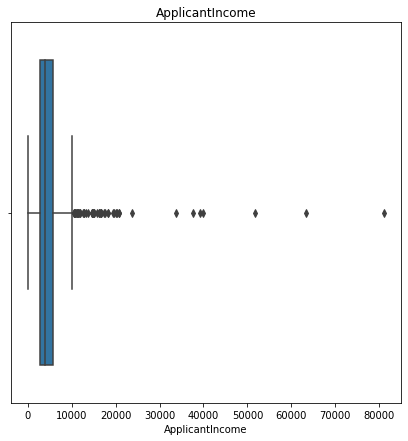

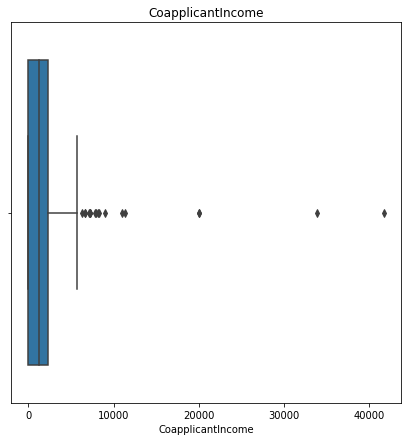

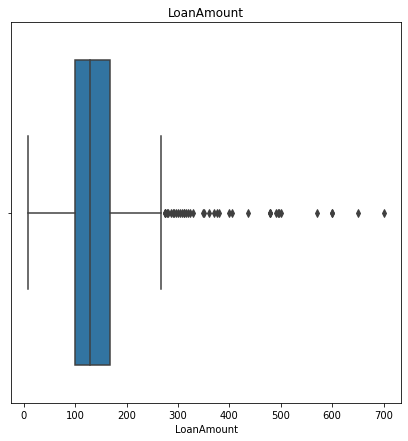

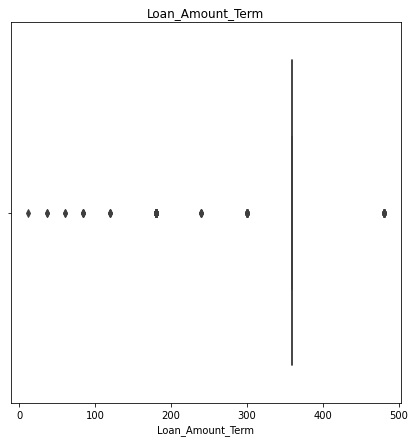

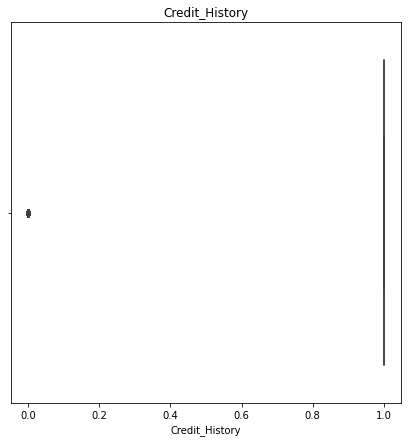

In [115]:
for feature in numerical_features:
    plt.figure(figsize = (7, 7))
    sns.boxplot(train_df[feature])
    plt.title(feature)

In [116]:
features_with_outliers = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [117]:
for feature in features_with_outliers:
    Q1 = train_df[feature].quantile(0.25)
    Q3 = train_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (IQR*1.5)
    upper_limit = Q3 + (IQR*1.5)
    train_df.loc[train_df[feature] < lower_limit, feature] = lower_limit
    train_df.loc[train_df[feature] > upper_limit, feature] = upper_limit

C:\Users\sadha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sadha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sadha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

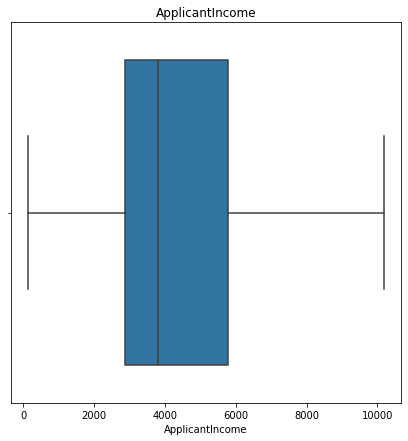

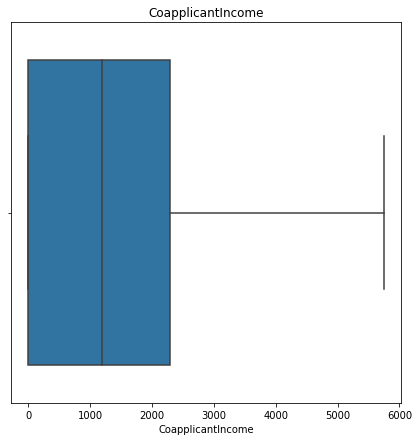

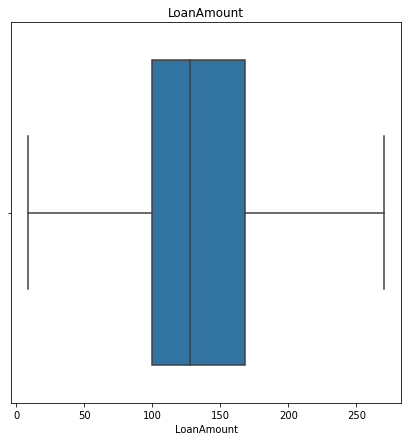

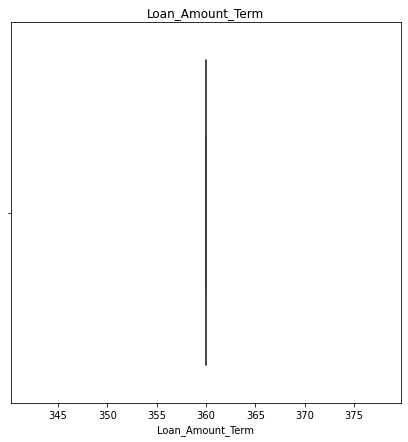

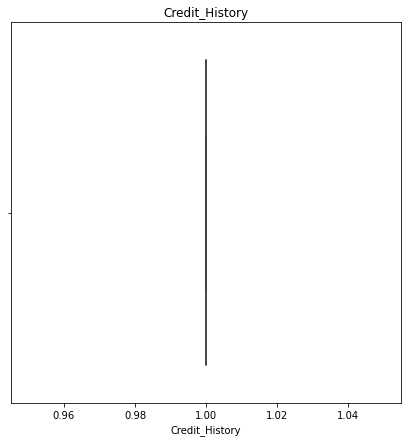

In [118]:
for feature in numerical_features:
    plt.figure(figsize = (7, 7))
    sns.boxplot(train_df[feature])
    plt.title(feature)

In [119]:
numerical_features_with_null = [feature for feature in numerical_features if train_df[feature].isnull().sum()]
numerical_features_with_null

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [120]:
for feature in numerical_features_with_null:
    mean_value = train_df[feature].mean()
    train_df[feature].fillna(mean_value, inplace = True)

In [121]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [122]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

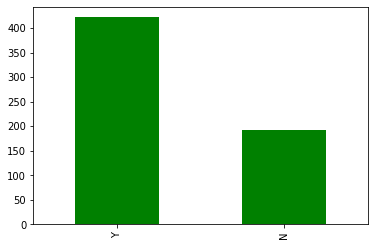

In [123]:
train_df['Loan_Status'].value_counts().plot(kind = 'bar', color = 'green')

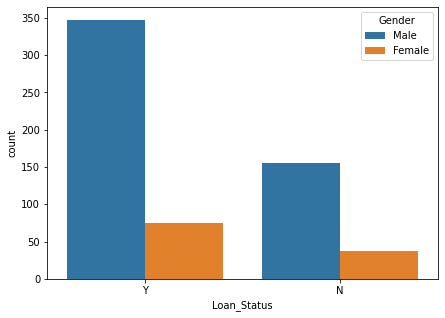

In [124]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(x = 'Loan_Status', hue = 'Gender', data = train_df)

In [125]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,138.288851,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


In [126]:
def encode_data(feature_name):
    
    '''
    
    function which takes feature name as a parameter and return mapping dictionary to raplace(or map) categorical data to numerical data
    
    '''
    
    mapping_dict = {}
    unique_values = list(train_df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
        
    print(mapping_dict)
    return mapping_dict

In [127]:
train_df[categorical_features]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [128]:
train_df['Gender'].replace({'Male' : 1, 'Female' : 2}, inplace = True)
train_df['Married'].replace({'Yes' : 1, 'No' : 0}, inplace = True)
train_df['Self_Employed'].replace({'Yes' : 1, 'No' : 0}, inplace = True)
train_df['Loan_Status'].replace({'Y' : 1, 'N' : 0}, inplace = True)

In [129]:
train_df[categorical_features]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,Urban,1
1,LP001003,1,1,1,Graduate,0,Rural,0
2,LP001005,1,1,0,Graduate,1,Urban,1
3,LP001006,1,1,0,Not Graduate,0,Urban,1
4,LP001008,1,0,0,Graduate,0,Urban,1
...,...,...,...,...,...,...,...,...
609,LP002978,2,0,0,Graduate,0,Rural,1
610,LP002979,1,1,3+,Graduate,0,Rural,1
611,LP002983,1,1,1,Graduate,0,Urban,1
612,LP002984,1,1,2,Graduate,0,Urban,1


In [130]:
train_df['Dependents'].replace(encode_data('Dependents'), inplace = True)

{'0': 0, '1': 1, '2': 2, '3+': 3}


In [131]:
train_df['Education'].replace(encode_data('Education'), inplace = True)

{'Graduate': 0, 'Not Graduate': 1}


In [132]:
train_df['Property_Area'].replace(encode_data('Property_Area'), inplace = True)

{'Urban': 0, 'Rural': 1, 'Semiurban': 2}


In [133]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 62.5+ KB


In [134]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            4
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [135]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         363 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [136]:
categorical_features = [column_name for column_name in test_df.columns if test_df[column_name].dtype == 'O']
print('Categorical Features : {}'.format(len(categorical_features)))
print('Categorical Features : {}'.format(categorical_features))

Categorical Features : 7
Categorical Features : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [137]:
numerical_features = [column_name for column_name in test_df.columns if test_df[column_name].dtype != 'O']
print('Numerical Features : {}'.format(len(numerical_features)))
print('Numerical Features : {}'.format(numerical_features))

Numerical Features : 5
Numerical Features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [138]:
test_df[categorical_features].isna().sum()

Loan_ID           0
Gender           11
Married           0
Dependents       10
Education         0
Self_Employed    23
Property_Area     0
dtype: int64

In [139]:
test_df[numerical_features].isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            4
Loan_Amount_Term      6
Credit_History       29
dtype: int64

In [140]:
test_df[categorical_features]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban
363,LP002975,Male,Yes,0,Graduate,No,Urban
364,LP002980,Male,No,0,Graduate,No,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,Rural


In [141]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         363 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [142]:
for each_feature in categorical_features:
    mode_value = test_df[each_feature].mode()[0]
    test_df[each_feature].fillna(mode_value, inplace = True)

In [143]:
test_df[categorical_features].isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [144]:
test_df[numerical_features].isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            4
Loan_Amount_Term      6
Credit_History       29
dtype: int64

In [145]:
numerical_feature_with_null = [feature for feature in numerical_features if test_df[feature].isna().sum()]
numerical_feature_with_null

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [146]:
for feature in numerical_feature_with_null:
    mean_value = test_df[feature].mean()
    test_df[feature].fillna(mean_value, inplace = True)

In [147]:
test_df[categorical_features].isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [148]:
test_df[numerical_features].isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [149]:
test_df[categorical_features].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban


In [150]:
test_df['Gender'].replace({'Male' : 1, 'Female' : 2}, inplace = True)
test_df['Married'].replace({'Yes' : 1, 'No' : 0}, inplace = True)
test_df['Self_Employed'].replace({'Yes' : 1, 'No' : 0}, inplace = True)

In [151]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 34.5+ KB


In [152]:
def encode_data(feature_name):
    
    '''
    
    function which takes feature name as a parameter and return mapping dictionry to replace (or map) categorical data to numerical data
    
    '''
    
    mapping_dict = {}
    unique_values = list(test_df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
        
    print(mapping_dict)
    return mapping_dict

In [153]:
test_df[categorical_features]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,1,1,0,Graduate,0,Urban
1,LP001022,1,1,1,Graduate,0,Urban
2,LP001031,1,1,2,Graduate,0,Urban
3,LP001035,1,1,2,Graduate,0,Urban
4,LP001051,1,0,0,Not Graduate,0,Urban
...,...,...,...,...,...,...,...
362,LP002971,1,1,3+,Not Graduate,1,Urban
363,LP002975,1,1,0,Graduate,0,Urban
364,LP002980,1,0,0,Graduate,0,Semiurban
365,LP002986,1,1,0,Graduate,0,Rural


In [154]:
test_df['Dependents'].replace(encode_data('Dependents'), inplace = True)

{'0': 0, '1': 1, '2': 2, '3+': 3}


In [155]:
test_df['Education'].replace(encode_data('Education'), inplace = True)

{'Graduate': 0, 'Not Graduate': 1}


In [156]:
test_df['Property_Area'].replace(encode_data('Property_Area'), inplace = True)

{'Urban': 0, 'Semiurban': 1, 'Rural': 2}


In [157]:
test_df[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loan_ID        367 non-null    object
 1   Gender         367 non-null    int64 
 2   Married        367 non-null    int64 
 3   Dependents     367 non-null    int64 
 4   Education      367 non-null    int64 
 5   Self_Employed  367 non-null    int64 
 6   Property_Area  367 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 20.2+ KB


In [158]:
test_df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    367 non-null    int64  
 1   CoapplicantIncome  367 non-null    int64  
 2   LoanAmount         367 non-null    float64
 3   Loan_Amount_Term   367 non-null    float64
 4   Credit_History     367 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 14.5 KB


In [159]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 34.5+ KB


In [160]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.000000,0
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,0
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,0
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,0
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.000000,0
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.000000,0
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,0.825444,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.000000,2


In [161]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,138.288851,360.0,1.0,0,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1,1,3,0,0,4106.0,0.0,40.000000,360.0,1.0,1,1
611,LP002983,1,1,1,0,0,8072.0,240.0,253.000000,360.0,1.0,0,1
612,LP002984,1,1,2,0,0,7583.0,0.0,187.000000,360.0,1.0,0,1


In [162]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 34.5+ KB


In [163]:
X_train = train_df.drop('Loan_Status', axis = 1)
y_train = train_df['Loan_Status']
X_test = test_df.drop('Loan_ID', axis = 1).copy()

In [164]:
X_train = X_train.drop('Loan_ID', axis = 1)

In [165]:
sgd = SGDClassifier(max_iter = 5, tol = None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train)*100, 2)

In [166]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)

In [167]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train)*100, 2)

In [168]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)*100, 2)

In [169]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train)*100, 2)

In [170]:
perceptron = Perceptron(max_iter = 10)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train)*100, 2)

C:\Users\sadha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [171]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train)*100, 2)

C:\Users\sadha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [172]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train)*100, 2)

In [173]:
results = pd.DataFrame({'Model' : ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Descent', 'Decision Tree'], 'Score' : [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]})
results_df = results.sort_values(by = 'Score', ascending = False)
results_df = results_df.set_index('Score')
results_df.head(9)

,Model
Score,
99.67,Random Forest
99.67,Decision Tree
78.50,KNN
68.73,Support Vector Machines
68.73,Logistic Regression
68.73,Naive Bayes
68.73,Stochastic Gradient Descent
31.27,Perceptron


In [174]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring = 'accuracy')

print('Scores : ', scores)
print('Mean : ', scores.mean())
print('Standard Deviation : ', scores.std())

Scores :  [0.62903226 0.64516129 0.62903226 0.61290323 0.68852459 0.68852459
 0.59016393 0.59016393 0.62295082 0.6557377 ]
Mean :  0.6352194606028556
Standard Deviation :  0.03314786526668276


In [175]:
importances = pd.DataFrame({'Feature' : X_train.columns, 'importance' : np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values(by = 'importance', ascending = False).set_index('Feature')
importances.head(12)

,importance
Feature,
ApplicantIncome,0.298
LoanAmount,0.278
CoapplicantIncome,0.164
Dependents,0.073
Property_Area,0.070
Education,0.034
Married,0.031
Gender,0.026
Self_Employed,0.025


<AxesSubplot:xlabel='Feature'>

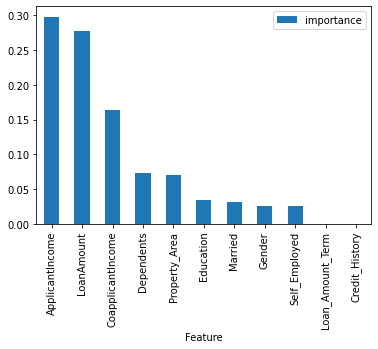

In [176]:
importances.plot.bar()

In [177]:
train_df = train_df.drop('Credit_History', axis = 1)
test_df = test_df.drop('Credit_History', axis = 1)

train_df = train_df.drop('Loan_Amount_Term', axis = 1)
test_df = test_df.drop('Loan_Amount_Term', axis = 1)

train_df = train_df.drop('Self_Employed', axis = 1)
test_df = test_df.drop('Self_Employed', axis = 1)

train_df = train_df.drop('Gender', axis = 1)
test_df = test_df.drop('Gender', axis = 1)

train_df = train_df.drop('Married', axis = 1)
test_df = test_df.drop('Married', axis = 1)

train_df = train_df.drop('Education', axis = 1)
test_df = test_df.drop('Education', axis = 1)

In [178]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(X_train, y_train)
random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)
print(round(acc_random_forest, 2,), '%')

99.67 %


In [179]:
print('OOB Score : ', round(random_forest.oob_score_, 4)*100, '%')

OOB Score :  66.29 %


In [180]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv = 3)
confusion_matrix(y_train, predictions)

array([[ 30, 162],
       [ 53, 369]], dtype=int64)

In [181]:
from sklearn.metrics import precision_score, recall_score
print('Precision : ', precision_score(y_train, predictions))
print('Recall : ', recall_score(y_train, predictions))

Precision :  0.6949152542372882
Recall :  0.8744075829383886


In [182]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7743966421825813

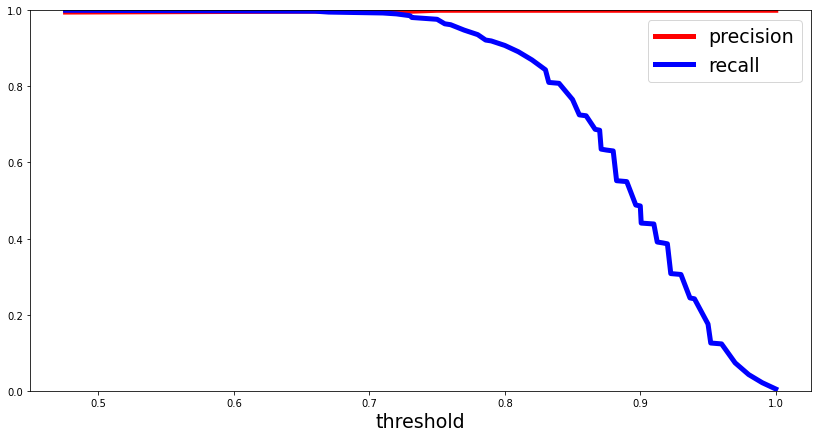

In [183]:
from sklearn.metrics import precision_recall_curve
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:, 1]
precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'r-', label = 'precision', linewidth = 5)
    plt.plot(threshold, recall[:-1], 'b', label = 'recall', linewidth = 5)
    plt.xlabel('threshold', fontsize = 19)
    plt.legend(loc = 'upper right', fontsize = 19)
    plt.ylim([0, 1])
    
plt.figure(figsize = (14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

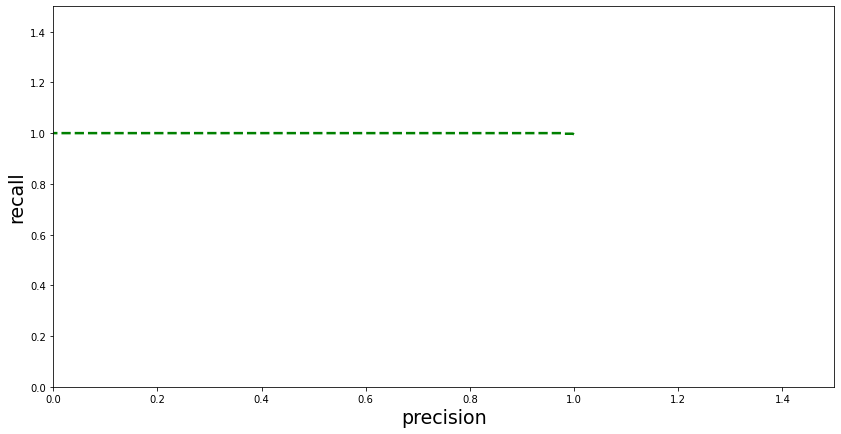

In [184]:
def plot_precision_vs_recall(precison, recall):
    plt.plot(recall, precision, 'g--', linewidth = 2.5)
    plt.ylabel('recall', fontsize = 19)
    plt.xlabel('precision', fontsize = 19)
    plt.axis([0, 1.5, 0, 1.5])
    
plt.figure(figsize = (14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

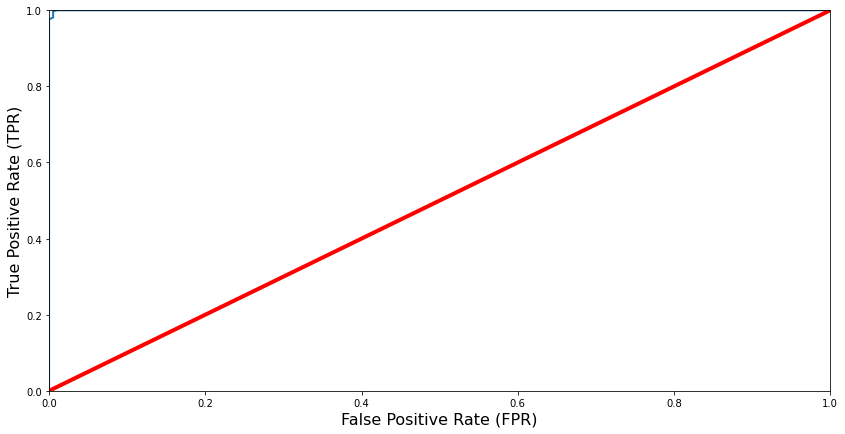

In [185]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_scores)
def plot_roc_curve(false_positive_rate, true_positive_rate, label = None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'r', linewidth = 4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)', fontsize = 16)
    plt.ylabel('True Positive Rate (TPR)', fontsize = 16)
    
plt.figure(figsize = (14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [186]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print('ROC-AUC-Scores : ', r_a_score)

ROC-AUC-Scores :  0.9998827507898894


In [187]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train)*100, 2)

In [190]:
submission = pd.DataFrame({'Loan_ID' : test_df.Loan_ID, 'Loan_Status' : y_pred})
submission.to_csv('my_submission.csv', index = False)